In [49]:
from kafka import KafkaConsumer
import time
from time import sleep
from json import loads
from json import dumps
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import time
import pymysql
import statistics

In [ ]:
def consumer_3(p1,p2,p3):
    try:
        connection = pymysql.connect(host='localhost',
                                     database='mydb',
                                     user='hamz',
                                     password='453565')

        table = """INSERT INTO support(Price, Support, Resistence) 
           VALUES (%s, %s, %s)"""

        cursor = connection.cursor()
        result = cursor.execute(table,(p1,p2,p3))
        connection.commit()

        print("Record Inserted Successfully.")

    except pymysql.Error as error:
        print("Failed to insert record in MySQL: {}".format(error))
    finally:
        if connection is not None:
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

In [8]:
consumer = KafkaConsumer('topic2',
                        bootstrap_servers=['localhost:9092'],
                        value_deserializer=lambda x:json.loads(x.decode('utf-8')))

In [15]:
consumer = KafkaConsumer(
    'topic3',
    bootstrap_servers=['localhost:9092'],
    value_deserializer=lambda x: loads(x.decode('utf-8'))
)

In [52]:
# Set start time and time limit for consumer
start_time = time.time()
time_limit = 10  # in seconds

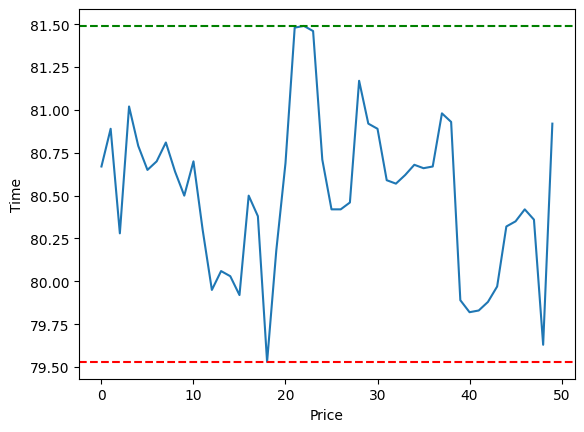

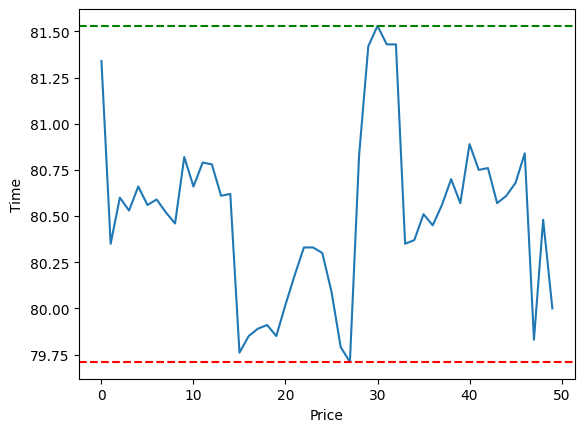

In [53]:
# Initialize empty list to store price data
price_data = []

# Monitor stock prices
for message in consumer:
    # Check if time limit has been reached
    elapsed_time = time.time() - start_time
    if elapsed_time >= time_limit:
        break
    stock_data = message.value
    price = stock_data['Close:CL=F']
    
    # Add price to price data list
    price_data.append(price)
    
    # Limit price data to last 10 prices
    price_data = price_data[-50:]
    
    # Process data and draw graph after 10 messages
    if len(price_data) == 50:
        # Draw support and resistance lines based on last 10 prices
        fig, ax = plt.subplots()
        ax.plot(price_data)
        ax.set_xlabel('Price')
        ax.set_ylabel('Time')
        mean1 = statistics.mean(price_data)
        # Calculate and draw support and resistance lines
        support = np.min(price_data)
        resistance = np.max(price_data)
        consumer_3(mean1,support,resistance)
        ax.axhline(y=support, color='r', linestyle='--')
        ax.axhline(y=resistance, color='g', linestyle='--')

        # Show plot
        plt.show()

        # Reset price data list
        price_data = []
    
    # Wait for 1 seconds before processing the next message
    time.sleep(0.05)